In [ ]:
"""Задача 2 (6 баллов). В файле «data2.csv» представлены данные наблюдений о
прибыли (второй столбец) в зависимости от установленной скидки (первый
столбец).
Комментарий. На самом деле эти данные сгенерированы синтетически, в
учебных целях, но смысл значений в этой задаче не важен, и эти данные можно
рассматривать как реальный датасет.
Бизнес-консультанты считают, что реальная зависимость прибыли от
установленной скидки может быть описана квадратичной или кубической
функцией (то есть полиномом второй или третьей степени,f(x) = a2x2 +a1x+a0 илиf(x)= a33x +a x22+a1x+a0)."""

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

dataset = np.genfromtxt('data2.csv', delimiter=';', skip_header=1) #загрузка и вывод данных
print("Данные успешно загружены!")
print(dataset)

Данные успешно загружены!
[[ 0.2        -6.57266488]
 [ 0.4        -5.37046782]
 [ 0.6        -3.15858504]
 [ 0.8        -1.48270657]
 [ 1.         -0.12384439]
 [ 1.2         2.40389623]
 [ 1.4         4.14683298]
 [ 1.6         6.32790239]
 [ 1.8         8.82291549]
 [ 2.         10.88542758]
 [ 2.2        13.31557662]
 [ 2.4        15.47213024]
 [ 2.6        17.26743396]
 [ 2.8        18.81843147]
 [ 3.         20.6263378 ]
 [ 3.2        23.04006768]
 [ 3.4        23.92053257]
 [ 3.6        25.32216894]
 [ 3.8        26.52298732]
 [ 4.         26.76261011]
 [ 4.2        27.65896563]
 [ 4.4        27.35973442]
 [ 4.6        27.37007024]
 [ 4.8        26.15215361]
 [ 5.         25.23920411]]


In [11]:
print("1. 3 точки для полинома 2й степени")
discounts = dataset[:, 0] # берем все скидки
profits = dataset[:, 1] # берем всю прибыль

total_points = len(discounts) # сколько всего точек
first_point = 0
middle_point = total_points // 2
last_point = -1

chosen_indices = [first_point, middle_point, last_point]
chosen_discounts = discounts[chosen_indices] # скидки этих точек
chosen_profits = profits[chosen_indices] # прибыли этих точек

for idx in range(3):
    print(f"Скидка={chosen_discounts[idx]}, Прибыль={chosen_profits[idx]:.2f}")

1. 3 точки для полинома 2й степени
Скидка=0.2, Прибыль=-6.57
Скидка=2.6, Прибыль=17.27
Скидка=5.0, Прибыль=25.24


In [12]:
print("2 Решите СЛУ")
quadratic_matrix = np.array([
    [chosen_discounts[0]**2, chosen_discounts[0], 1],
    [chosen_discounts[1]**2, chosen_discounts[1], 1],
    [chosen_discounts[2]**2, chosen_discounts[2], 1]
])
target_values = chosen_profits # какие прибыли должны получиться

quadratic_coeffs = solve(quadratic_matrix, target_values) # решаем ур
c2, c1, c0 = quadratic_coeffs
print(quadratic_coeffs)

2 Решите СЛУ
[-1.37745909 13.79025996 -9.27561851]


In [13]:
print("3. Вектор значений построенного полинома для заданных точек.")
calculated_values = c2*discounts**2 + c1*discounts + c0 # предсказанные прибыли для всех скидок
print(calculated_values)

3. Вектор значений построенного полинома для заданных точек.
[-6.57266488 -3.97990798 -1.49734781  0.87501564  3.13718236  5.28915236
  7.33092563  9.26250217 11.08388198 12.79506506 14.39605142 15.88684106
 17.26743396 18.53783014 19.69802959 20.74803231 21.68783831 22.51744758
 23.23686012 23.84607594 24.34509503 24.73391739 25.01254302 25.18097193
 25.23920411]


4. Построение в одной области двух графиков: один по заданным в файле точкам, другой – по полученному вектору.


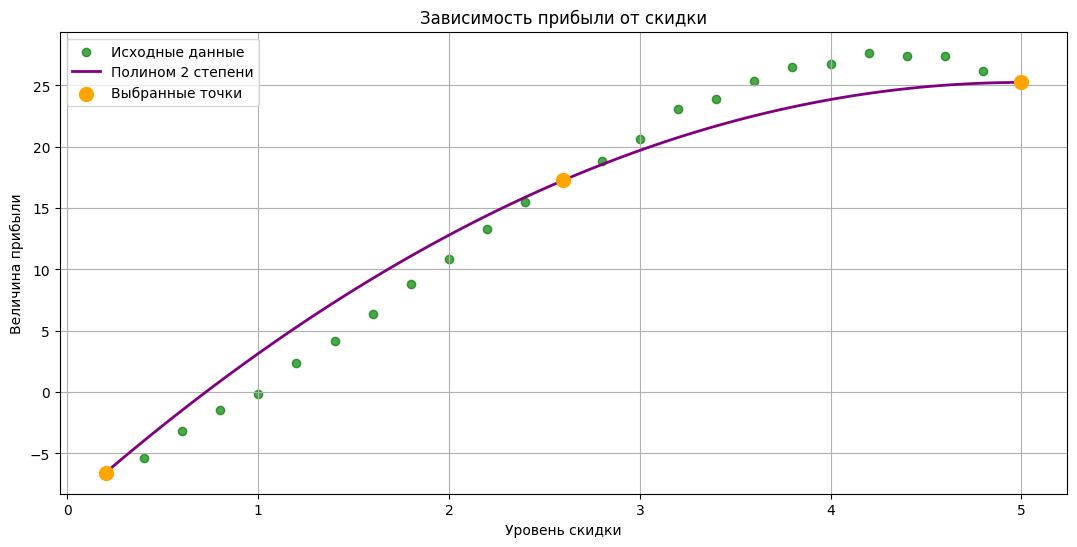

In [14]:
print("4. Построение в одной области двух графиков: один по заданным в файле точкам, другой – по полученному вектору.")
plt.figure(figsize=(13, 6))

plt.scatter(discounts, profits, alpha=0.7, label='Исходные данные', color='green')

smooth_discounts = np.linspace(discounts.min(), discounts.max(), 100) # 100 равном распред чисел от мин до макс скидки
smooth_profits_quad = c2*smooth_discounts**2 + c1*smooth_discounts + c0 # прибыль для этих 100 точек
plt.plot(smooth_discounts, smooth_profits_quad, color='purple', linewidth=2, label='Полином 2 степени')

plt.scatter(chosen_discounts, chosen_profits, color='orange', s=100, zorder=5, label='Выбранные точки')

plt.xlabel('Уровень скидки')
plt.ylabel('Величина прибыли')
plt.title('Зависимость прибыли от скидки')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print("5. Значение квадратичного отклонения RSS")
RSS_quad = np.sum((profits - calculated_values)**2) # реальная прибыль - прибыль по формуле
print(f"Квадратичное отклонение: {RSS_quad:.4f}")

5. Значение квадратичного отклонения RSS
Квадратичное отклонение: 120.7875


6. Повторить шаги 1-5 для полинома 3й степени (для этого нужно будет выбрать 4 точки).
Выбранные точки для кубической модели:
Скидка=0.20, Прибыль=-6.57
Скидка=1.80, Прибыль=8.82
Скидка=3.40, Прибыль=23.92
Скидка=5.00, Прибыль=25.24

Коэффициенты кубической функции:
[-0.54854257  2.90393393  5.81106484 -7.84664687]



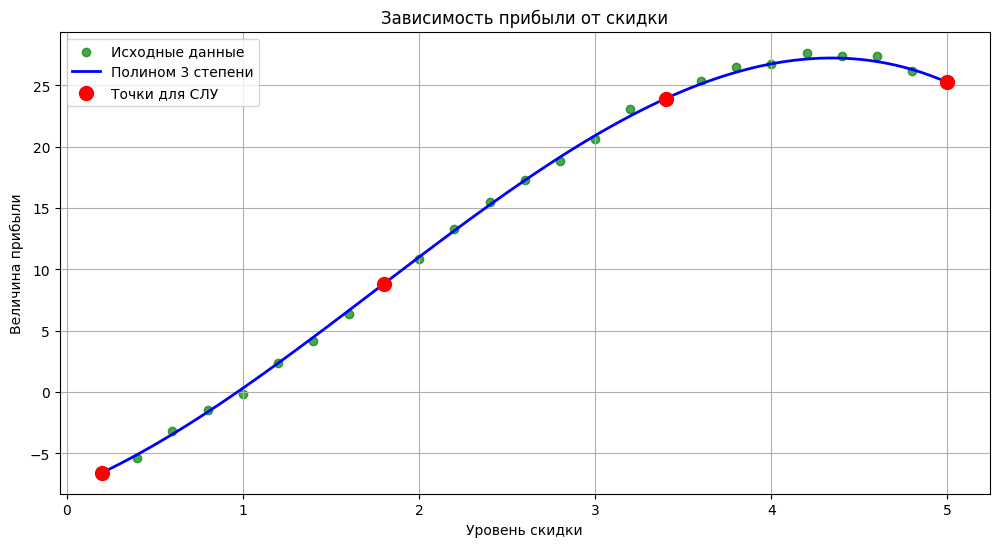


Квадратичное отклонение: 1.8784


In [16]:
print("6. Повторить шаги 1-5 для полинома 3й степени (для этого нужно будет выбрать 4 точки).")
chosen_indices_cubic = [0, total_points//3, 2*total_points//3, -1]
chosen_discounts_cubic = discounts[chosen_indices_cubic]
chosen_profits_cubic = profits[chosen_indices_cubic]

print("Выбранные точки для кубической модели:")
for idx in range(4):
    print(f"Скидка={chosen_discounts_cubic[idx]:.2f}, Прибыль={chosen_profits_cubic[idx]:.2f}")

cubic_matrix = np.array([
    [chosen_discounts_cubic[0]**3, chosen_discounts_cubic[0]**2, chosen_discounts_cubic[0], 1],
    [chosen_discounts_cubic[1]**3, chosen_discounts_cubic[1]**2, chosen_discounts_cubic[1], 1],
    [chosen_discounts_cubic[2]**3, chosen_discounts_cubic[2]**2, chosen_discounts_cubic[2], 1],
    [chosen_discounts_cubic[3]**3, chosen_discounts_cubic[3]**2, chosen_discounts_cubic[3], 1]
])
target_cubic = chosen_profits_cubic # какие прибыли должны получиться

cubic_coeffs = solve(cubic_matrix, target_cubic)
d3, d2, d1, d0 = cubic_coeffs

print(f"\nКоэффициенты кубической функции:")
print(cubic_coeffs)
print()

calculated_cubic = d3*discounts**3 + d2*discounts**2 + d1*discounts + d0

plt.figure(figsize=(12, 6))

plt.scatter(discounts, profits, alpha=0.7, label='Исходные данные', color='green')

smooth_discounts = np.linspace(discounts.min(), discounts.max(), 100)
smooth_profits_cubic = d3*smooth_discounts**3 + d2*smooth_discounts**2 + d1*smooth_discounts + d0
plt.plot(smooth_discounts, smooth_profits_cubic, color='blue', linewidth=2, label='Полином 3 степени')

plt.scatter(chosen_discounts_cubic, chosen_profits_cubic, color='red', s=100, zorder=5, label='Точки для СЛУ')

plt.xlabel('Уровень скидки')
plt.ylabel('Величина прибыли')
plt.title('Зависимость прибыли от скидки')
plt.legend()
plt.grid(True)
plt.show()

RSS_cubic = np.sum((profits - calculated_cubic)**2)
print()
print(f"Квадратичное отклонение: {RSS_cubic:.4f}")

In [17]:
print("8. Выберите тот вариант, где значение отклонения (RSS) получается наименьшим. Для этого варианта посчитайте ожидаемое значение прибыли при значениях скидки в 6 и 8 процентов.")
new_discounts = np.array([6.0, 8.0])

if RSS_quad < RSS_cubic:
    print(f"\nОптимальная модель: квадратичная (RSS = {RSS_quad:.4f})")
    predicted_profits = c2*new_discounts**2 + c1*new_discounts + c0
else:
    print(f"\nОптимальная модель: кубическая (RSS = {RSS_cubic:.4f})")
    predicted_profits = d3*new_discounts**3 + d2*new_discounts**2 + d1*new_discounts + d0

print(f"\nПрогнозируемая прибыль:")
for idx in range(2):
    print(f"Скидка {new_discounts[idx]}%: {predicted_profits[idx]:.2f}")

8. Выберите тот вариант, где значение отклонения (RSS) получается наименьшим. Для этого варианта посчитайте ожидаемое значение прибыли при значениях скидки в 6 и 8 процентов.

Оптимальная модель: кубическая (RSS = 1.8784)

Прогнозируемая прибыль:
Скидка 6.0%: 13.08
Скидка 8.0%: -56.36
